# **Random Forest Parameters**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("rice.xlsx")

## *About Data*

In [4]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.3+ KB


In [7]:
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

## *Visualization*

<Axes: xlabel='Class', ylabel='count'>

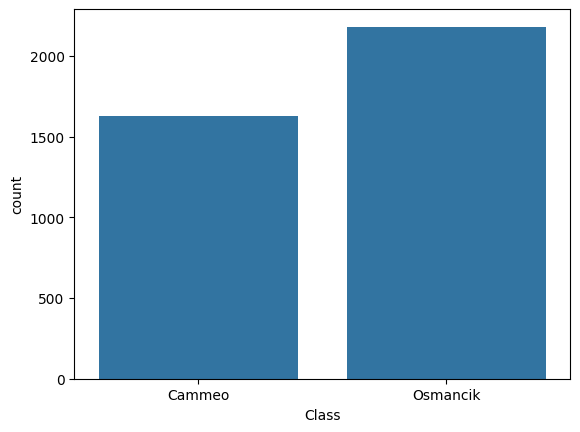

In [9]:
sns.countplot(x= "Class", data= df)

<Axes: xlabel='Area', ylabel='Perimeter'>

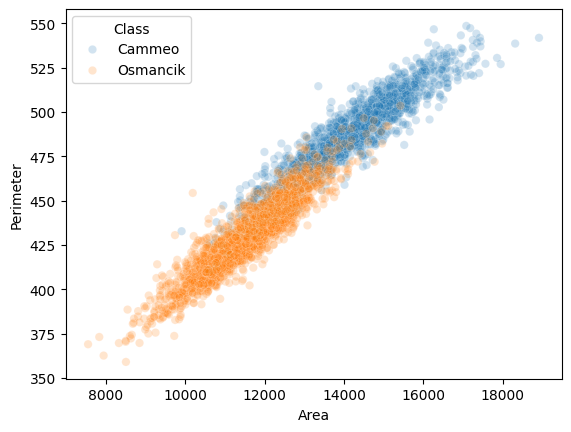

In [10]:
sns.scatterplot(data= df, x= "Area", y= "Perimeter", alpha= 0.2, hue= "Class")

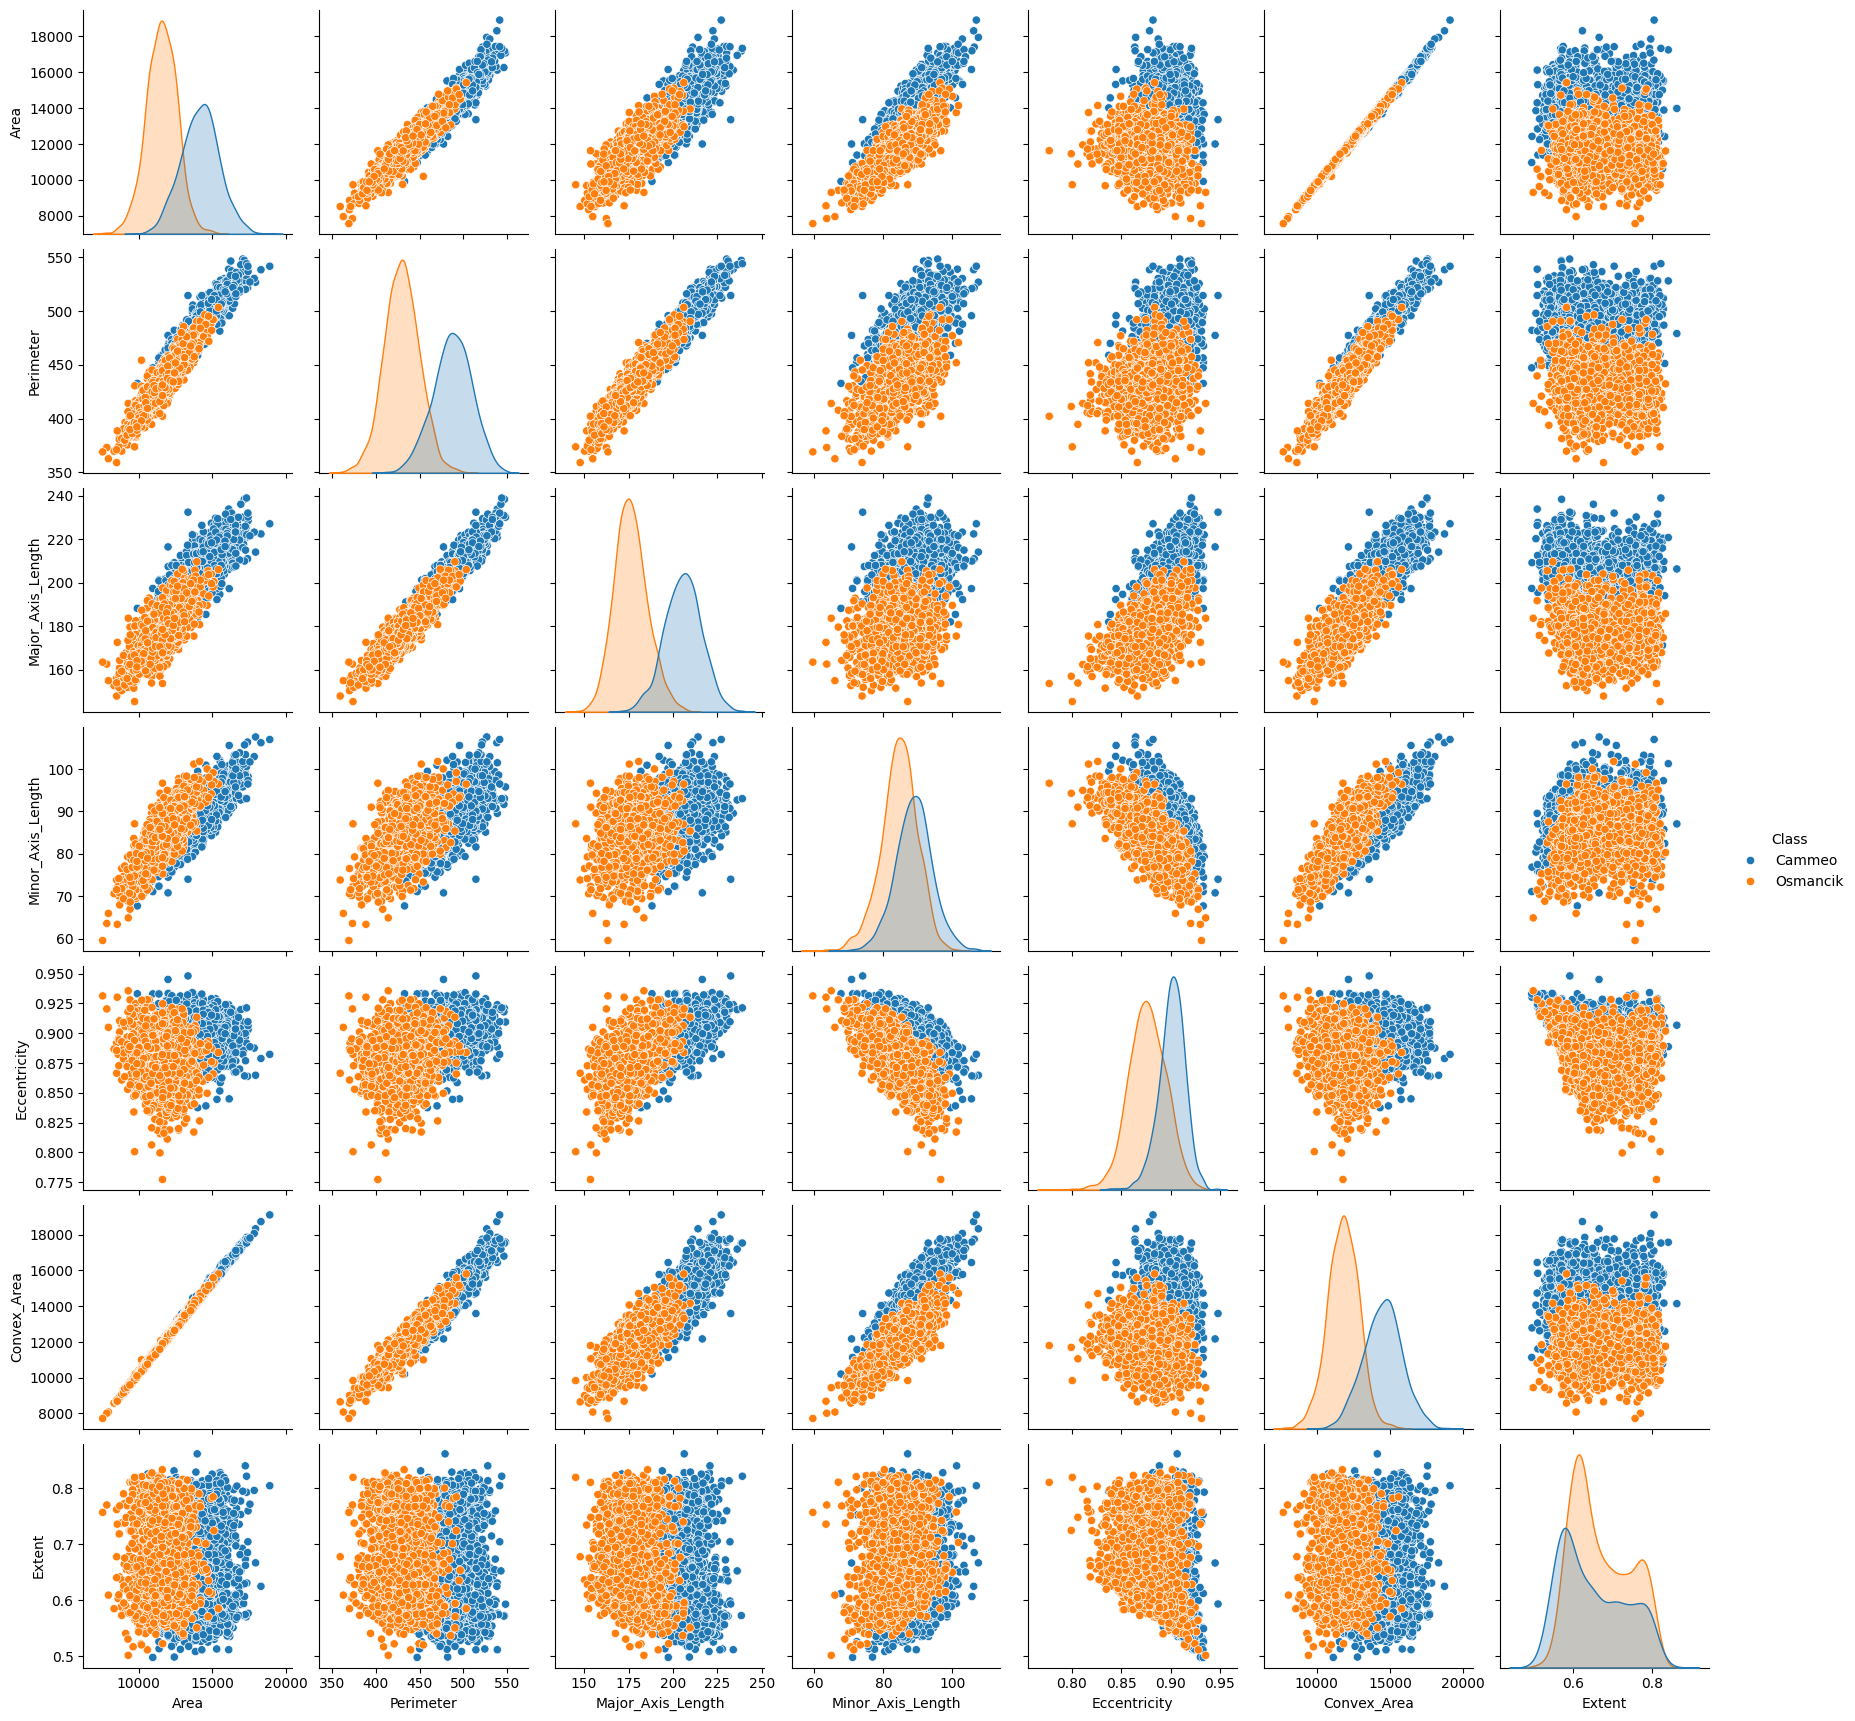

In [11]:
sns.pairplot(data= df, hue= "Class")

In [13]:
df.corr(numeric_only= True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


<Axes: >

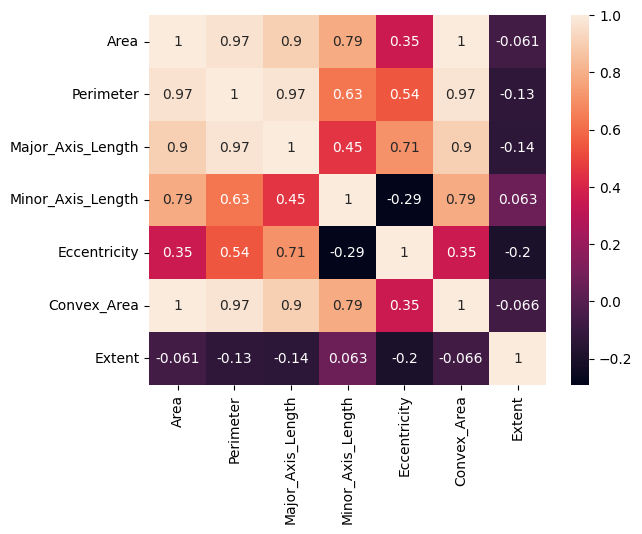

In [14]:
sns.heatmap(df.corr(numeric_only= True), annot= True)

## *Train Test Split*

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop("Class", axis= 1)
y = pd.get_dummies(df["Class"], drop_first= True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 9)

## *Random Forest Parameters*

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
n_estimator = [9, 64, 128, 200]
max_features = [1, 2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

In [29]:
parameters = {
    "n_estimators" : n_estimator,
    "max_features" : max_features,
    "bootstrap" : bootstrap,
    "oob_score" : oob_score
}

In [30]:
rand_forest = RandomForestClassifier()

In [31]:
grid_search = GridSearchCV(rand_forest, parameters)

In [32]:
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [33]:
prediction = grid_search.predict(X_test)

## *Performance*

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

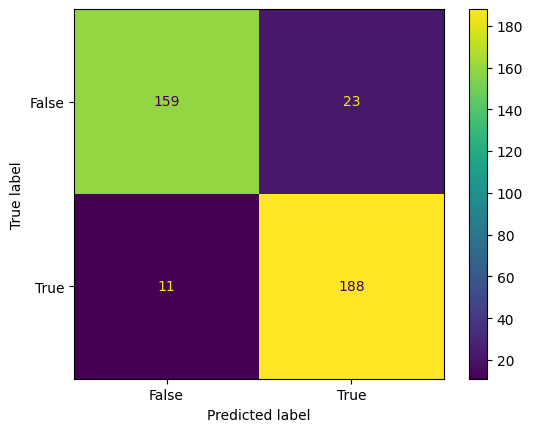

In [35]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test)

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.94      0.87      0.90       182
        True       0.89      0.94      0.92       199

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381

